# Importing required Python Libraries
* NumPy and Pandas -For computation of array of elements and data frames
* Matplotlib and Seaborn - For graphical visualisation
* Also, we are importing 2 modules for matplotlib such as pyplot and ticker for
  visualisation
* All the libraries are imported using a keywod 'as' to subsitute their name for easy usage in code

In [6]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Read the input data
* Data is provided in *.csv format (Comma-Separated Values)

In [7]:
# Reading the data using pandas read_csv option and naming the dataframe as telco_base_data
telco_base_data = pd.read_csv('/content/Customer-Churn.csv')

In [8]:
#Checking the first 5 entries of the data frame to confirm if the input was successful
telco_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

Data cleaning is crucial for Exploratory Data Analysis (EDA) as it ensures that the data is accurate, consistent, and free from errors, enabling analysts to make reliable and meaningful insights from the dataset.

In [9]:
# Analyse the data types and non-null values of each data column using the info function
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##1. Data Type Change

  - The above data shows all data types except "TotalCharges" column
    are in 'object' type instead of 'float64'.

In [10]:
# We are using the 'to_numberic' function in Pandas to change the data type.
# The errors='coerce' parameter is used to replace any values that cannot be converted to numeric with NaN (Not a Number).
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [11]:
#Recheck the data type
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Null record treatment

In [12]:
#.isnull().sum() functions are used in combination to find the sum of null records in each data column
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

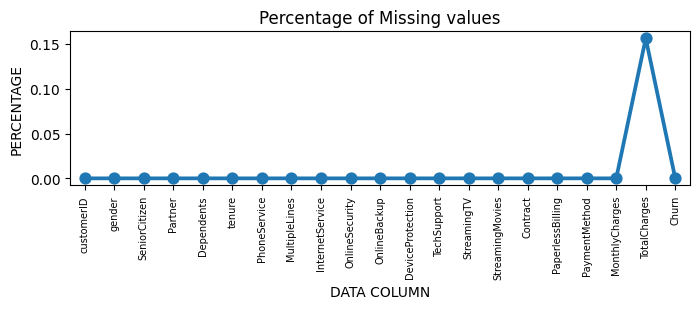

In [13]:
# Plot and visualize the percentage of missing values
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(8,2))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("DATA COLUMN")
plt.show()

### - Missing Value

- Since the % of these records compared to the total dataset is very
   low i.e. 0.15%, it is safe to ignore them or drop them from further processing

In [14]:
# In case you want to treat them, you can use mean() or median() to treat them
#telco_base_data.TotalCharges.mean()
#telco_base_data.TotalCharges.fillna(telco_base_data.TotalCharges.mean(), inplace='True')

In [15]:
# Removing null/missing values
telco_base_data.dropna(how='any', inplace=True)
# how='any' parameter indicates that any row containing at least one missing value in any column should be dropped.
# inplace=True parameter modifies the original data in the Data Frame "telco_base_data"

In [16]:
#Reconfirm Null values
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
#Check the length of the new record
len(telco_base_data)

7032

In [18]:
#Recheck the data
telco_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##3. Data Arrangement

- Upon analysing the data columns, tenure of the customers can be divided bins e.g for tenure <12 months, assign a tenure group of 0-12, and then 12-24, and so on..

In [19]:
#Using min function to find the minimum number of monthly tenure
telco_base_data.tenure.min()

1

In [20]:
#Using max function to find the maximum number of monthly tenure
telco_base_data.tenure.max()

72

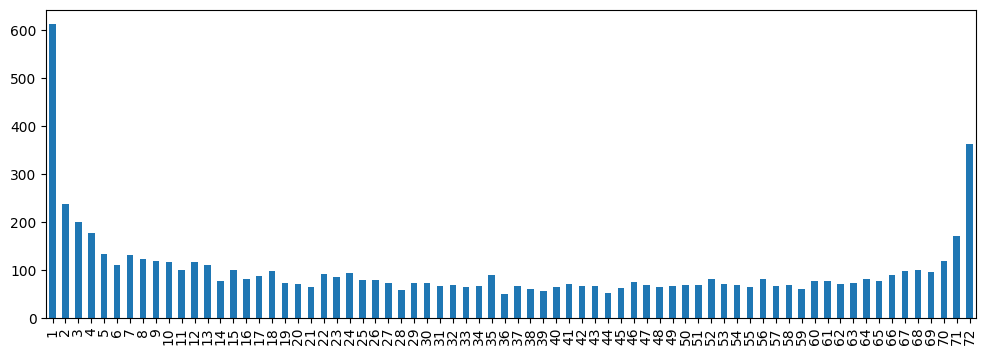

In [21]:
#Visual representation of Tenure
#Sorting the data column for the purpose of plot
sorted_counts = telco_base_data['tenure'].value_counts().sort_index()
#define the type of plot and edit image size
sorted_counts.plot(kind='bar', figsize=(12, 4))
plt.show()

In [22]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [23]:
#Display the count in each group
telco_base_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [24]:
#describe() method in Pandas provides a quick statistical summary of the numerical columns in a DataFrame
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##4. Dropping unnecessary columns
 - Data columns "CustomerID" and "Tenure" are removed from the data
   frame since these columns don't serve any significance in analysis

In [25]:
# Using drop function to remove columns customerID and tenure
telco_base_data.drop(columns=['customerID', 'tenure'], inplace=True)
# Recheck the data after columns are removed
telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Churn rate check

In [37]:
churn_percentage = telco_base_data.Churn.value_counts()/len(telco_base_data)*100

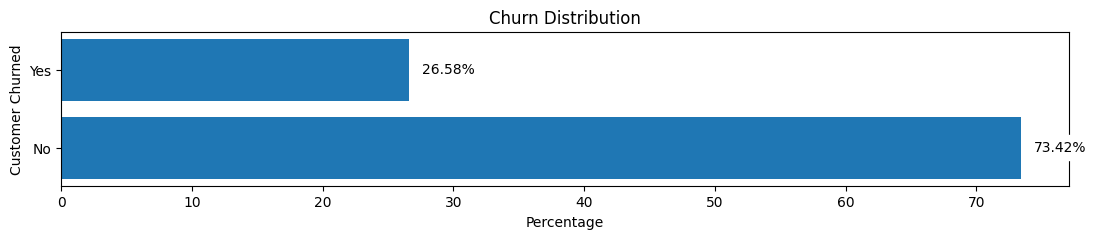

In [47]:
# Plotting a horizontal bar chart
plt.figure(figsize=(13, 2))  # Set the size of the chart
bars = plt.barh(churn_percentage.index, churn_percentage)

# Adding percentage labels on the right side of the bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, f'{xval:.2f}%', ha='left', va='center', backgroundcolor='white')

plt.title('Churn Distribution')  # Set the title of the chart
plt.xlabel('Percentage')  # Set the label for the x-axis
plt.ylabel('Customer Churned')  # Set the label for the y-axis
plt.show()


## Data Exploration - EDA


### Categorical Univariate Analysis

Univariate analysis of all categories individually against Churn


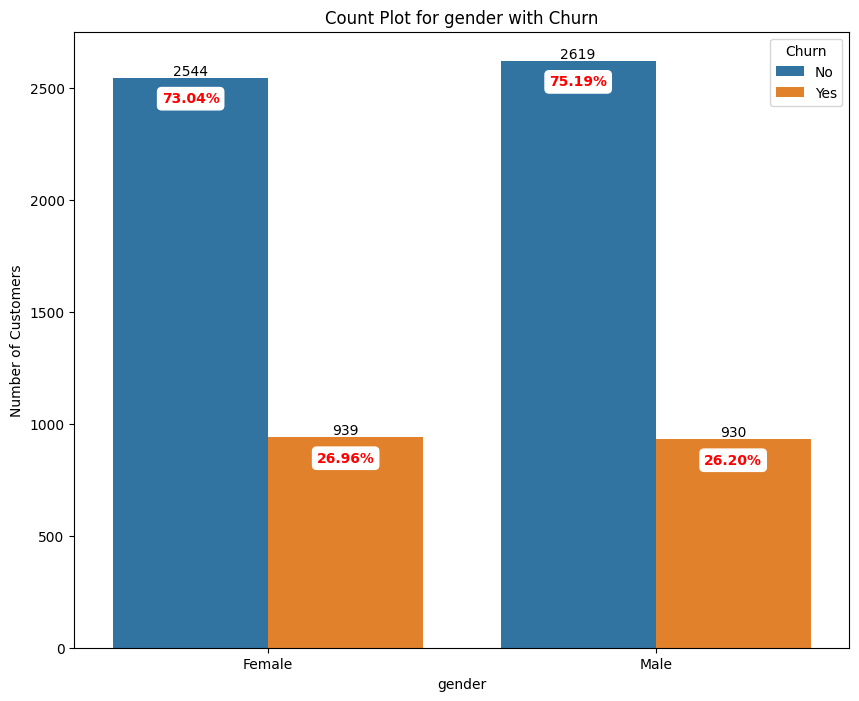

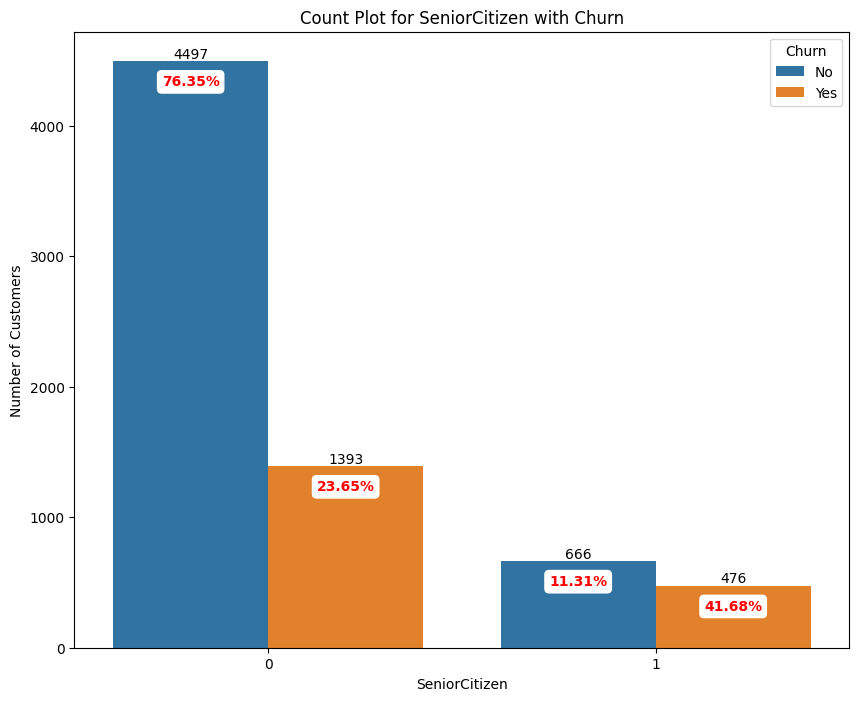

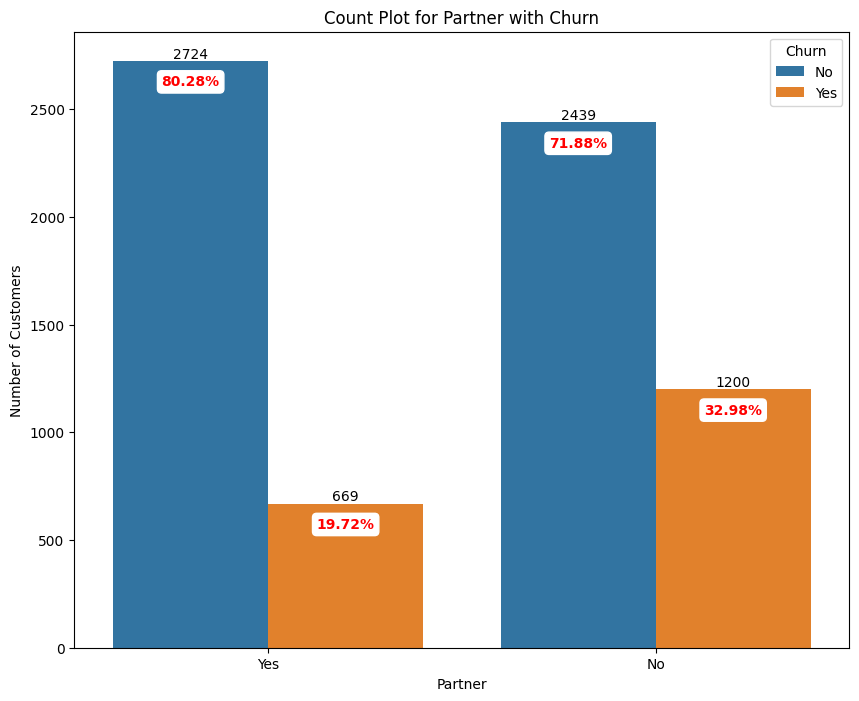

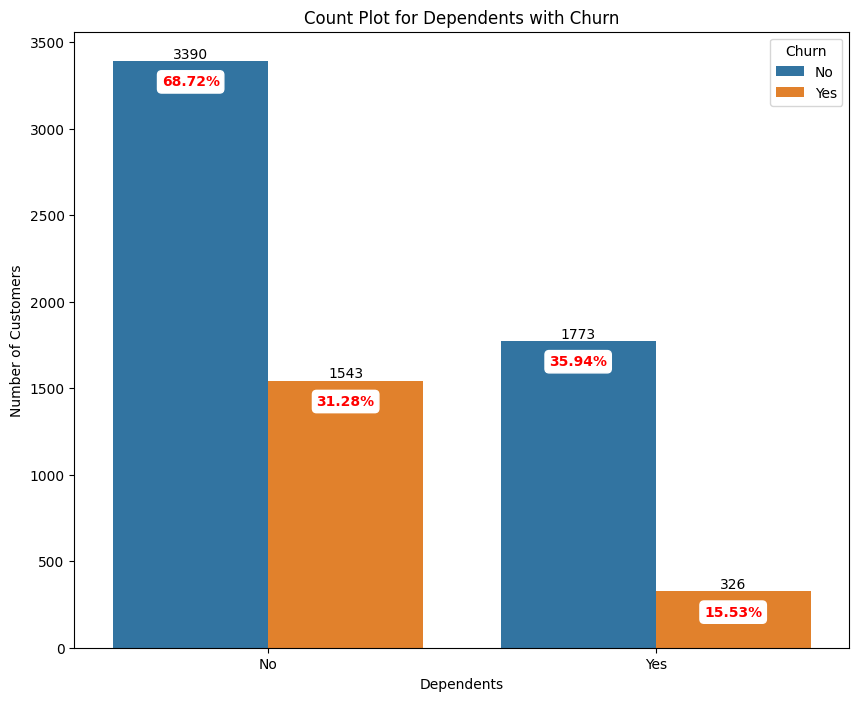

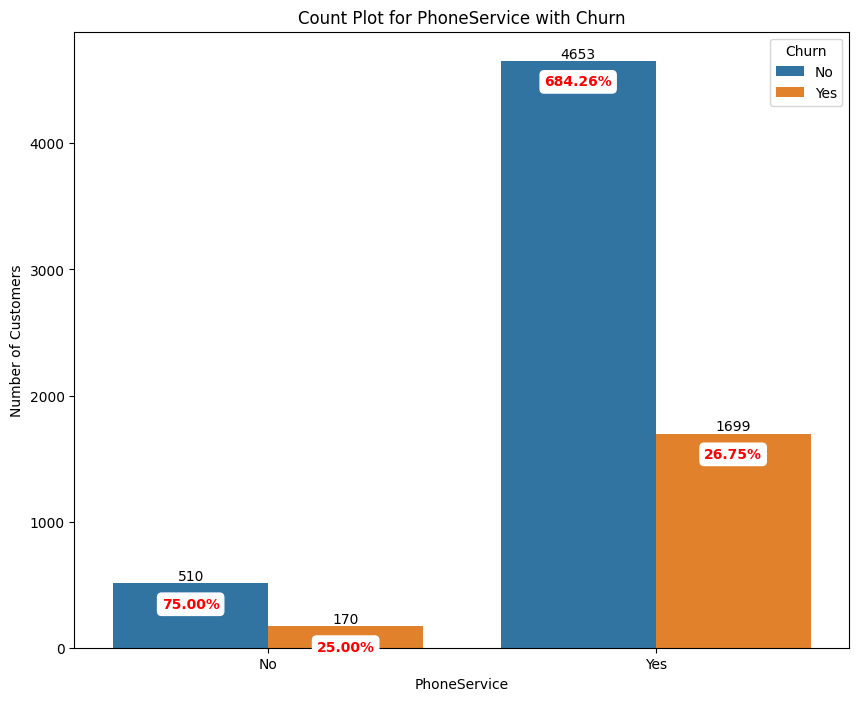

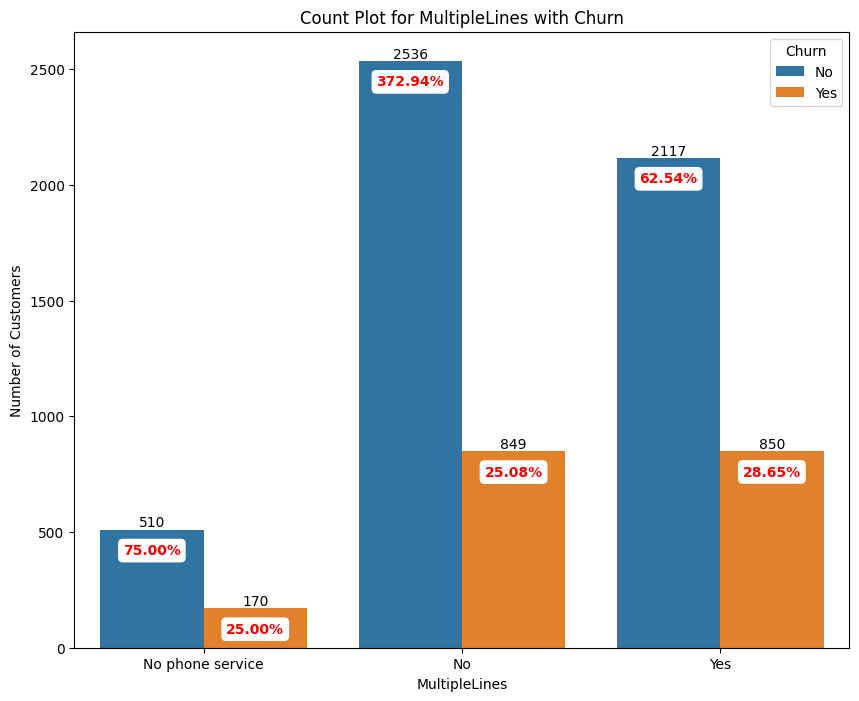

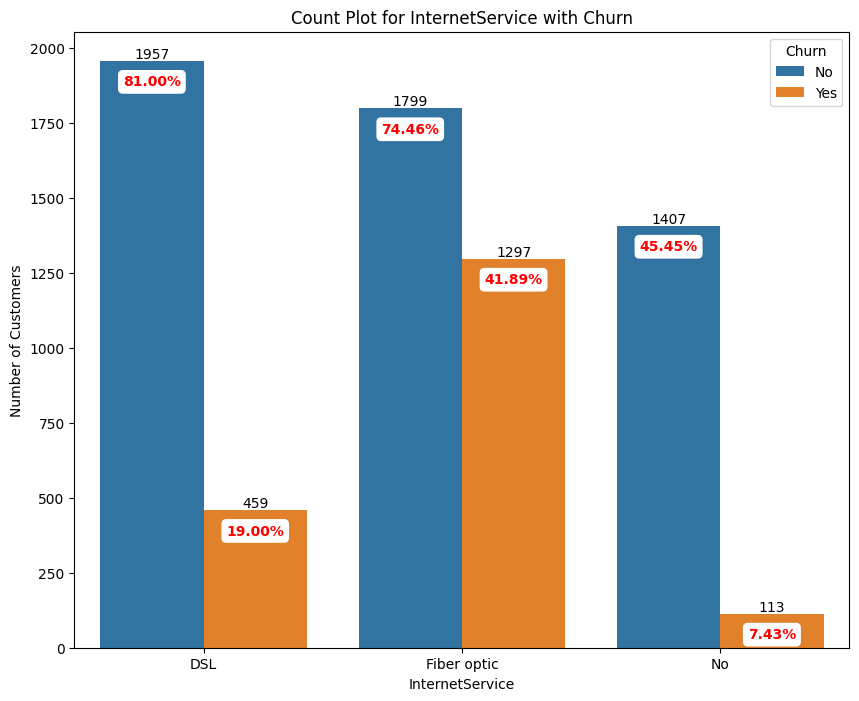

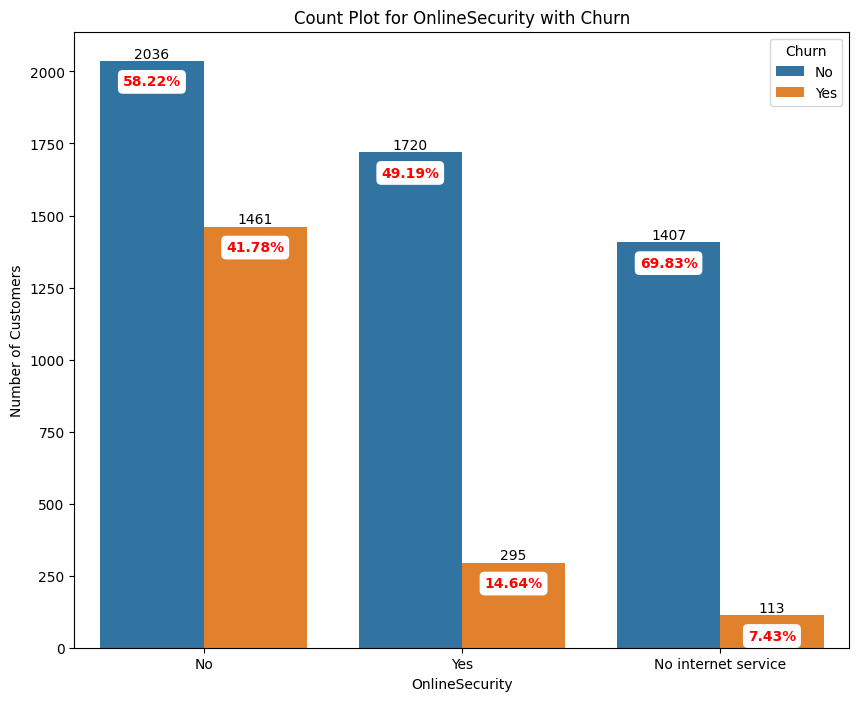

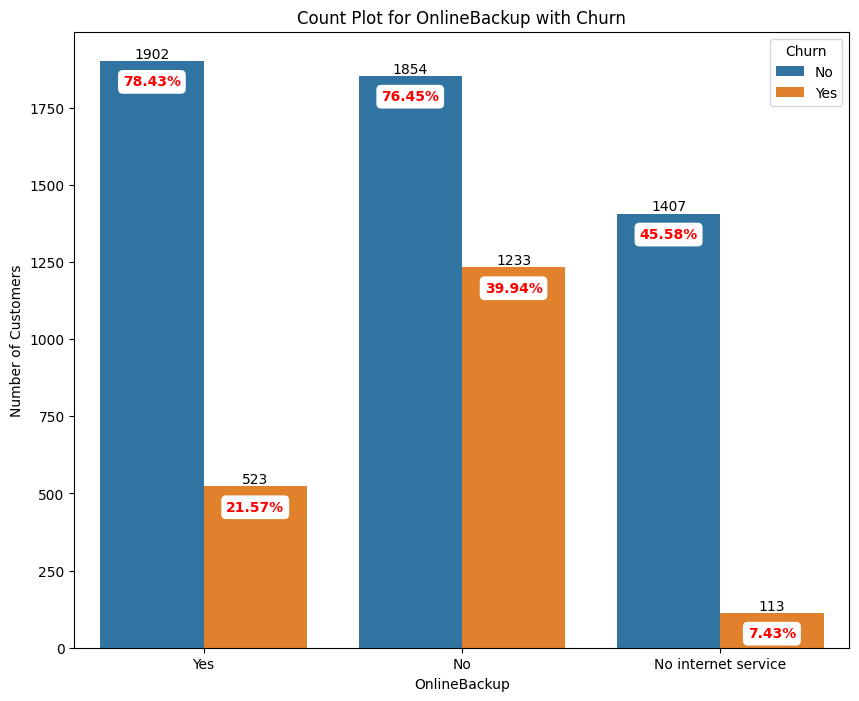

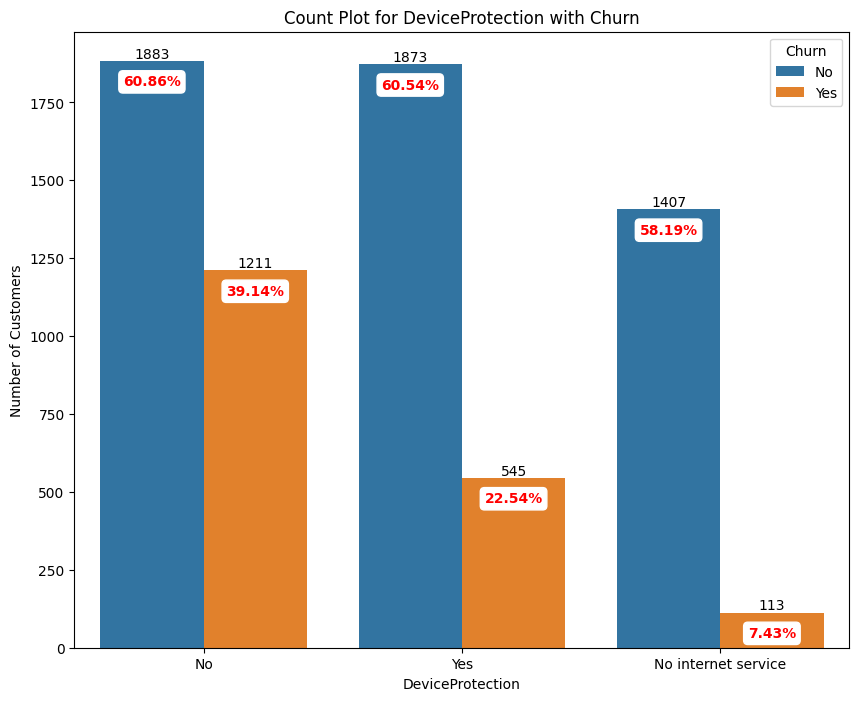

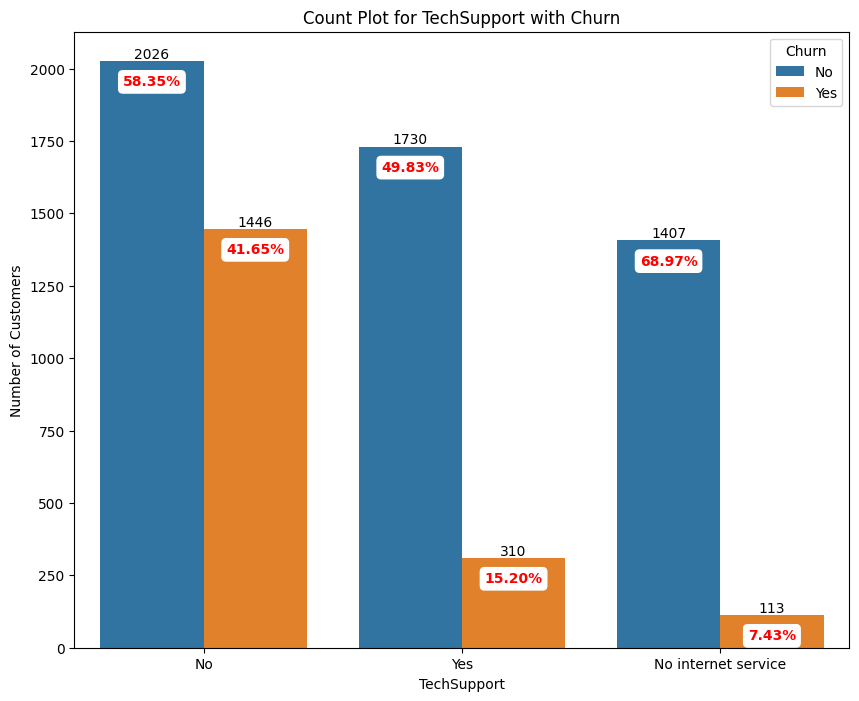

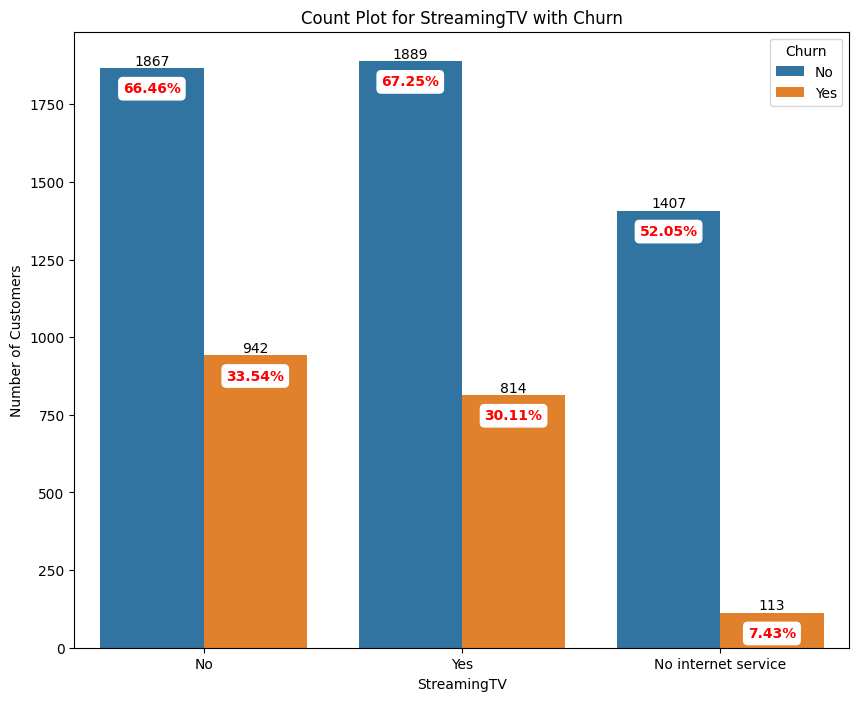

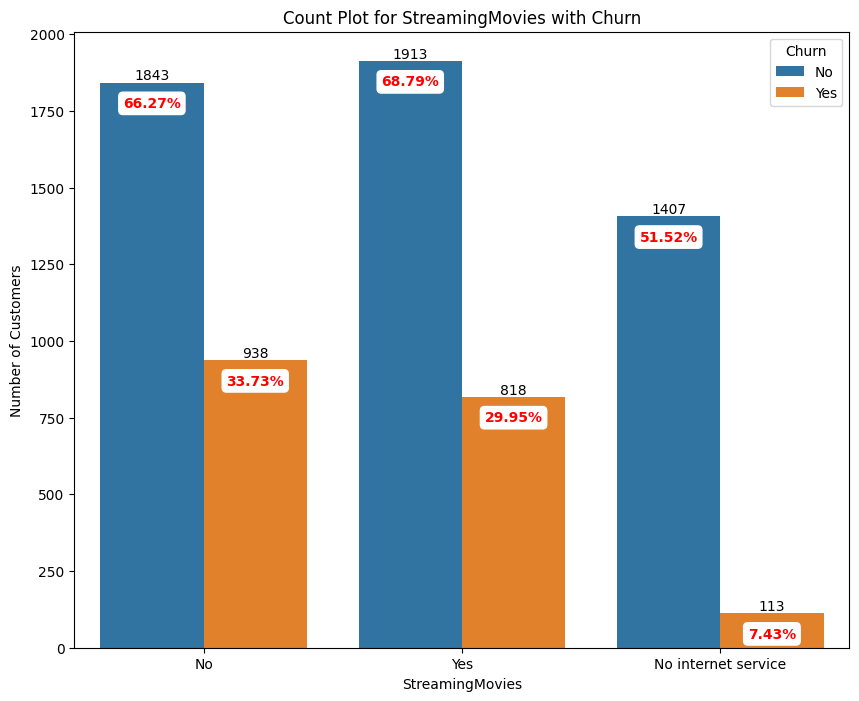

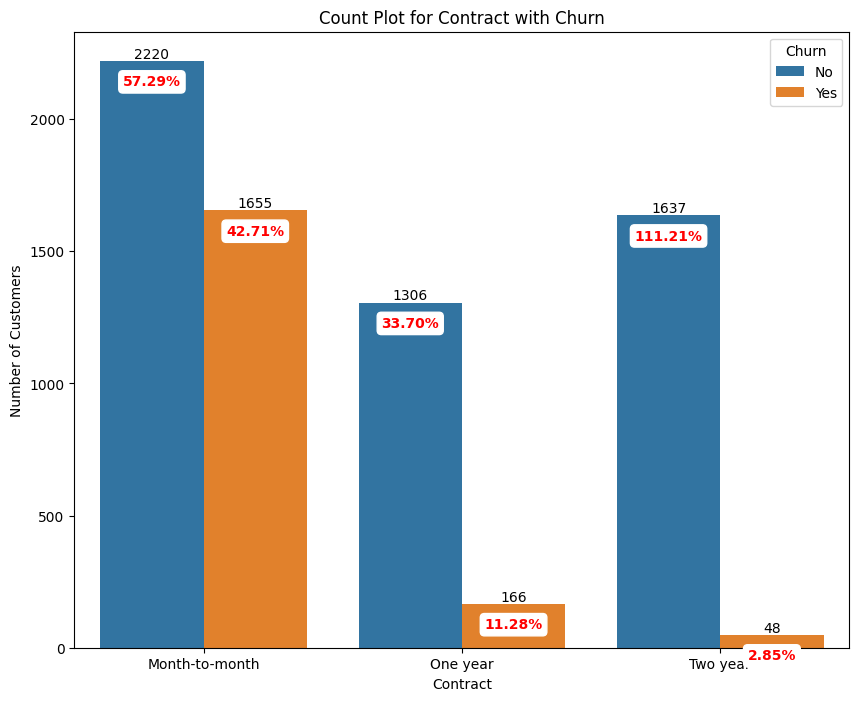

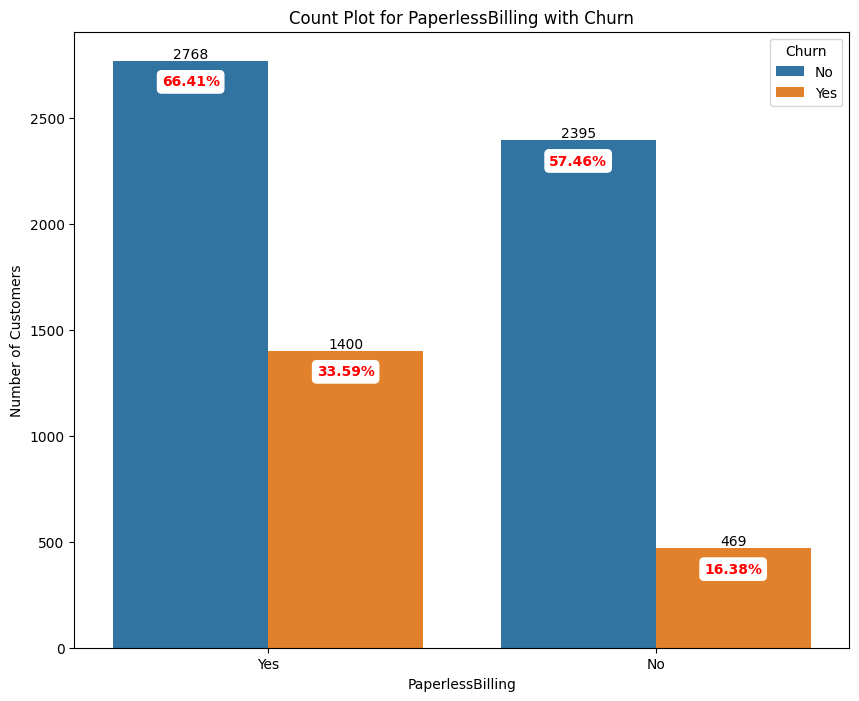

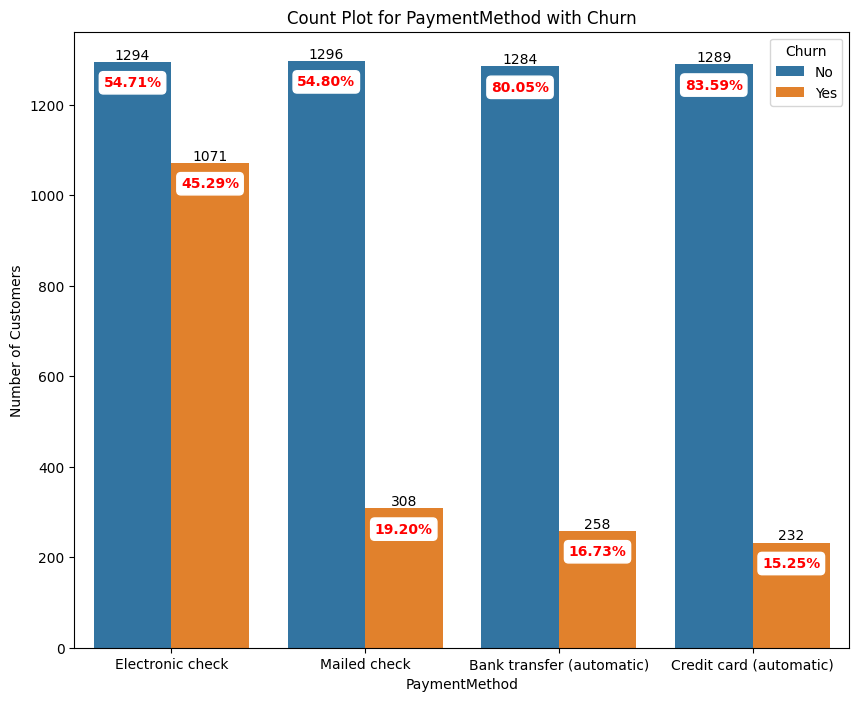

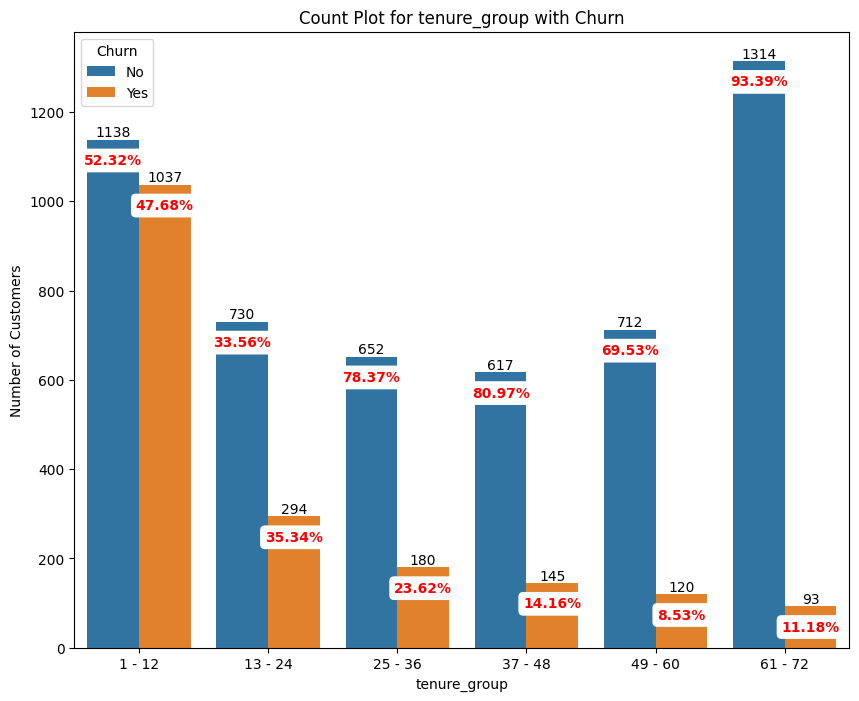

In [27]:
# Iterate through the predictors and create count plots with labels
#enumerate function is used to iterate over the columns of the data frame and drop the columns Churn, TotalCharges and MonthlyCharges
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    # Set the size for each graph
    plt.figure(i, figsize=(10, 8))

    #sns.countplot is a function provided by the Seaborn library for creating a bar plot to visualize the distribution of categorical data.
    # x=predictor: Each column of data frame for the x-axis
    # hue='Churn': Y- axis is Churn data
    ax = sns.countplot(data=telco_base_data, x=predictor, hue='Churn')

  # Add labels to the bars (excluding bars with height 0)
    for p in ax.patches:
        # Check if the bar height is greater than 0 before annotating to avoid the '0' annotation
        if p.get_height() > 0:
            # Annotate every bar with count
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

            # Calculate and annotate with percentage of 'Yes' (Churn=True)
            current_category = telco_base_data[predictor].unique()[int(p.get_x())]
            percentage_yes = (p.get_height() / telco_base_data[predictor].value_counts()[current_category]) * 100
            ax.annotate(f"{percentage_yes:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -15), textcoords='offset points', color='red')
            # Add bold with red and white background to the percentage annotation
            ax.annotate(f"{percentage_yes:.2f}%",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, -15),
                        textcoords='offset points', color='red', fontweight='bold', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
    # Set x-axis label
    ax.set_xlabel(predictor)

    # Set y-axis label
    ax.set_ylabel('Number of Customers')

    # Set plot title
    ax.set_title('Count Plot for ' + predictor + ' with Churn')

    # Display the plots
    plt.show()

### Numerical Univariate Analysis

Univariate analysis of all numerical values (Monthly and Total Charges against churn

<ipython-input-32-cd722ff63f1f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-32-cd722ff63f1f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


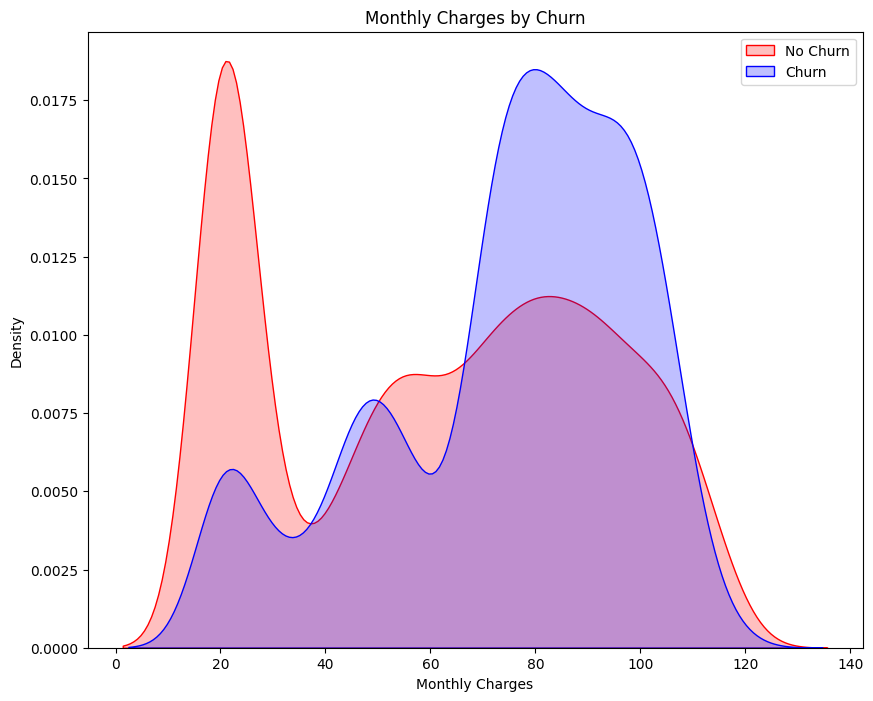

In [32]:
# Monthly Charges, distinguishing between churn and non-churn customers
# Set the figure size to (width, height) in inches
plt.figure(figsize=(10, 8))
# Use sns.kdeplot to create a Kernel Density Estimate plot
# Specify MonthlyCharges for customers with no churn ('No'), color them red, and shade the area under the curve
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
# Specify MonthlyCharges for customers with churn ('Yes'), color them blue, and shade the area under the curve
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)

# Adding legend to the plot
# loc='upper right' parameter sets the location of the legend to the upper right corner
MonthlyCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')

# Set y-axis and x-axis label
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')

# Set the title of the plot
MonthlyCharges.set_title('Monthly Charges by Churn')

# Show the plot
plt.show()

<ipython-input-33-ab356a392ee7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-33-ab356a392ee7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


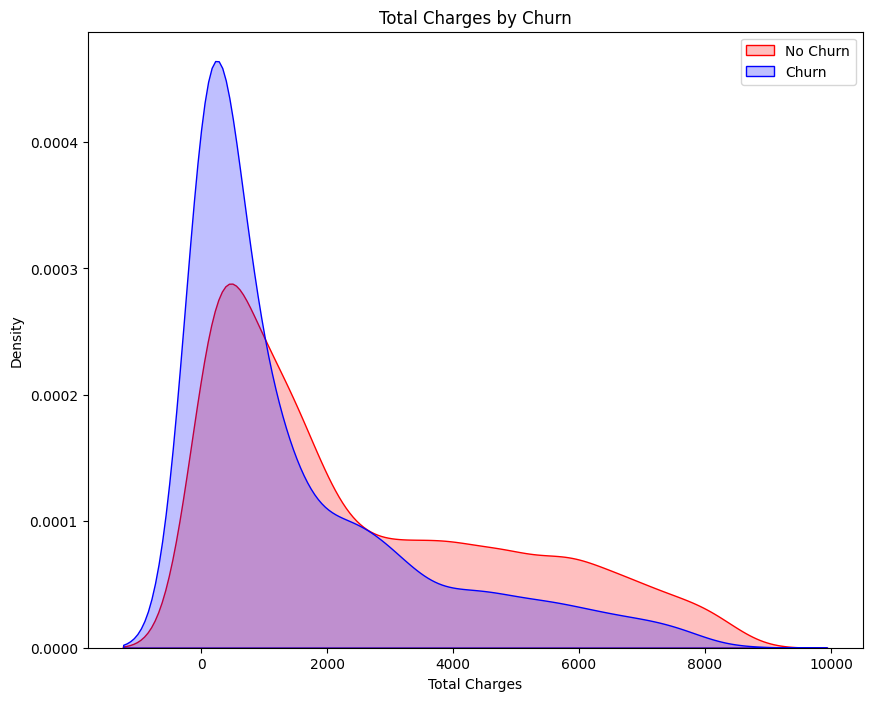

In [33]:
#Same as Monthly Charges except the data under review is Total Charges
plt.figure(figsize=(10, 8))
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
TotalCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('Total Charges')
TotalCharges.set_title('Total Charges by Churn')
plt.show()

In [ ]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges) #Correlation --> Peason's Correlation Coefficient --> -1, +1 -->
#~ 1 --> Positive correlation
#~ -1 --> Negative correlation
#~ 0 --> No or less correlation

0.6510648032262027

In [ ]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == "Yes", 1,0)

In [ ]:
telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


#### Categorical data to numerical data by Feature Encoding technique

In [ ]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Plotting the correlation plot of the entire data w.r.t Churn

<Axes: >

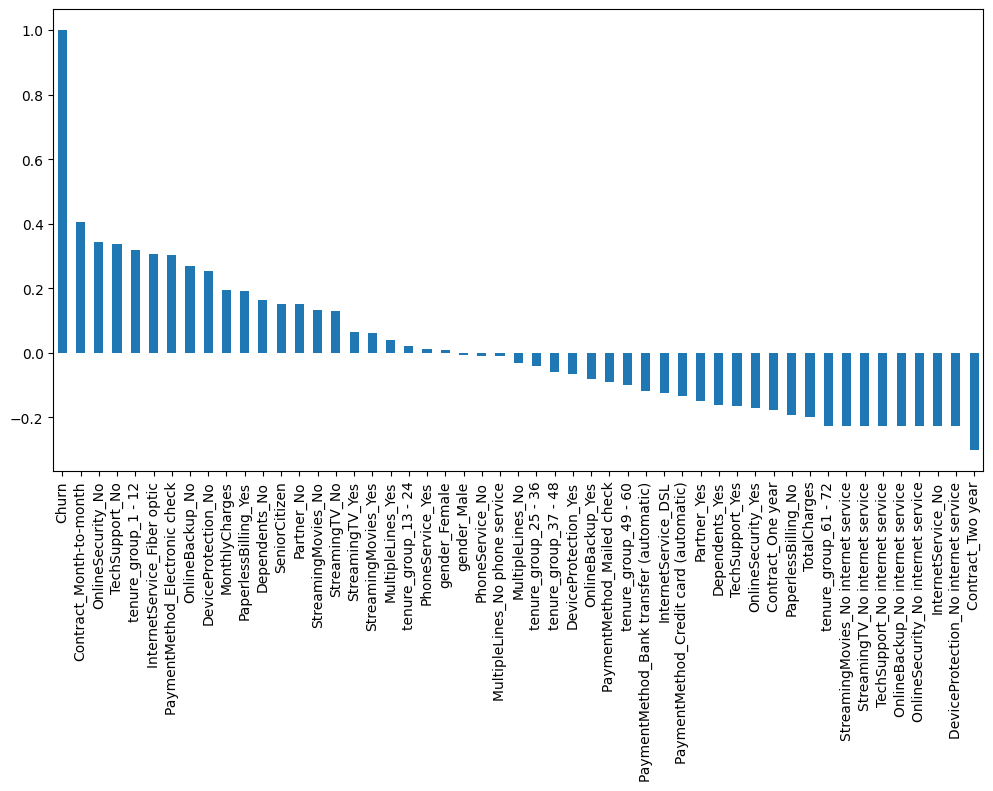

In [ ]:
plt.figure(figsize=(12,6))
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## Insights:

- Refer detailed presentation